In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

run_ID = "VPRM_new_optimized_params_diff_evo_V2_100"
base_path = "/home/madse/Downloads/Fluxnet_Data/all_tuned_params/" + run_ID

folders = [
    f
    for f in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, f))
]
flx_folders = [folder for folder in folders if folder.startswith("FLX_")]

if not flx_folders:
    print("Warning - There is no input data")
    raise SystemExit(0)

df_parameters = pd.DataFrame()


# Loop through each FLX_ folder and append data from XLSX files
for folder in flx_folders:
    folder_path = os.path.join(base_path, folder)
    files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]
    for file in files:
        file_path = os.path.join(folder_path, file)
        data = pd.read_excel(file_path)
        df_parameters = pd.concat([df_parameters, data], axis=0)
print(df_parameters)

   site_ID  PFT  Year       Topt        PAR0      beta     lambd     T_crit  \
0   IT-Isp  DBF  2013  25.240728  176.470321  0.514906  0.010000  10.683334   
1   IT-Isp  DBF  2014  24.833038  133.507813  0.606729  0.010000  13.405953   
0   CH-Cha  GRA  2005  22.294889  128.261167  1.000000  0.010000  11.381982   
1   CH-Cha  GRA  2006  15.854212  336.742260  1.000000  0.010000   5.485574   
2   CH-Cha  GRA  2007  15.335337  289.540342  1.000000  1.305993   0.162000   
..     ...  ...   ...        ...         ...       ...       ...        ...   
2   IT-Tor  GRA  2010   9.924381  338.210669  1.000000  0.052104   1.844349   
3   IT-Tor  GRA  2011  12.602454  347.597847  1.000000  0.010000   1.442766   
4   IT-Tor  GRA  2012  11.343434  267.483467  1.000000  0.355994  -7.448534   
5   IT-Tor  GRA  2013   4.164204  406.508567  0.997718  0.470997   3.925995   
6   IT-Tor  GRA  2014   6.570176  312.389770  1.000000  0.010000   2.316246   

      T_mult    alpha1  ...   R2_Reco    R2_NEE  RM

In [34]:
# List of tuples containing site_ID and Year values to drop
values_to_drop = [
    ("CH-Cha", 2009),
    ("CH-Cha", 2005),
    ("CH-Dav", 2005),
    ("CH-Fru", 2005),
    ("CH-Fru", 2006),
    ("CH-Lae", 2004),
    ("CZ-wet", 2006),
    ("DE-Lkb", 2009),
    ("DE-Lkb", 2010),
    ("DE-Lkb", 2013),
    ("DE-SfN", 2012),
    ("IT-La2", 2000),
    ("IT-La2", 2002),
    ("IT-PT1", 2002),
    ("IT-Ren", 2004),
    ("IT-Ren", 2001),
    ("IT-Ren", 2000),
    ("IT-Tor", 2008)
]

df_parameters['site_year'] = df_parameters['site_ID'] + '_' + df_parameters['Year'].astype(str)
for site_year in set(df_parameters['site_year']).intersection(set('_'.join(map(str, tpl)) for tpl in values_to_drop)):
    df_parameters = df_parameters[df_parameters['site_year'] != site_year]
df_parameters.drop(columns=['site_year'], inplace=True)

In [35]:

# TODO: setup for VPRM old
#     if VPRM_old_or_new == "new":
#         parameters_to_plot = [
#             "Topt",
#             "PAR0",
#             "lambd",
#             "alpha1",
#             "alpha2",
#             "beta",
#             "T_crit",
#             "T_mult",
#             "gamma",
#             "theta1",
#             "theta2",
#             "theta3",
#         ]
#     else:
#         parameters_to_plot = [
#             "Topt",
#             "PAR0",
#             "lambd",
#             "alpha",
#             "beta",
#         ]


/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categori

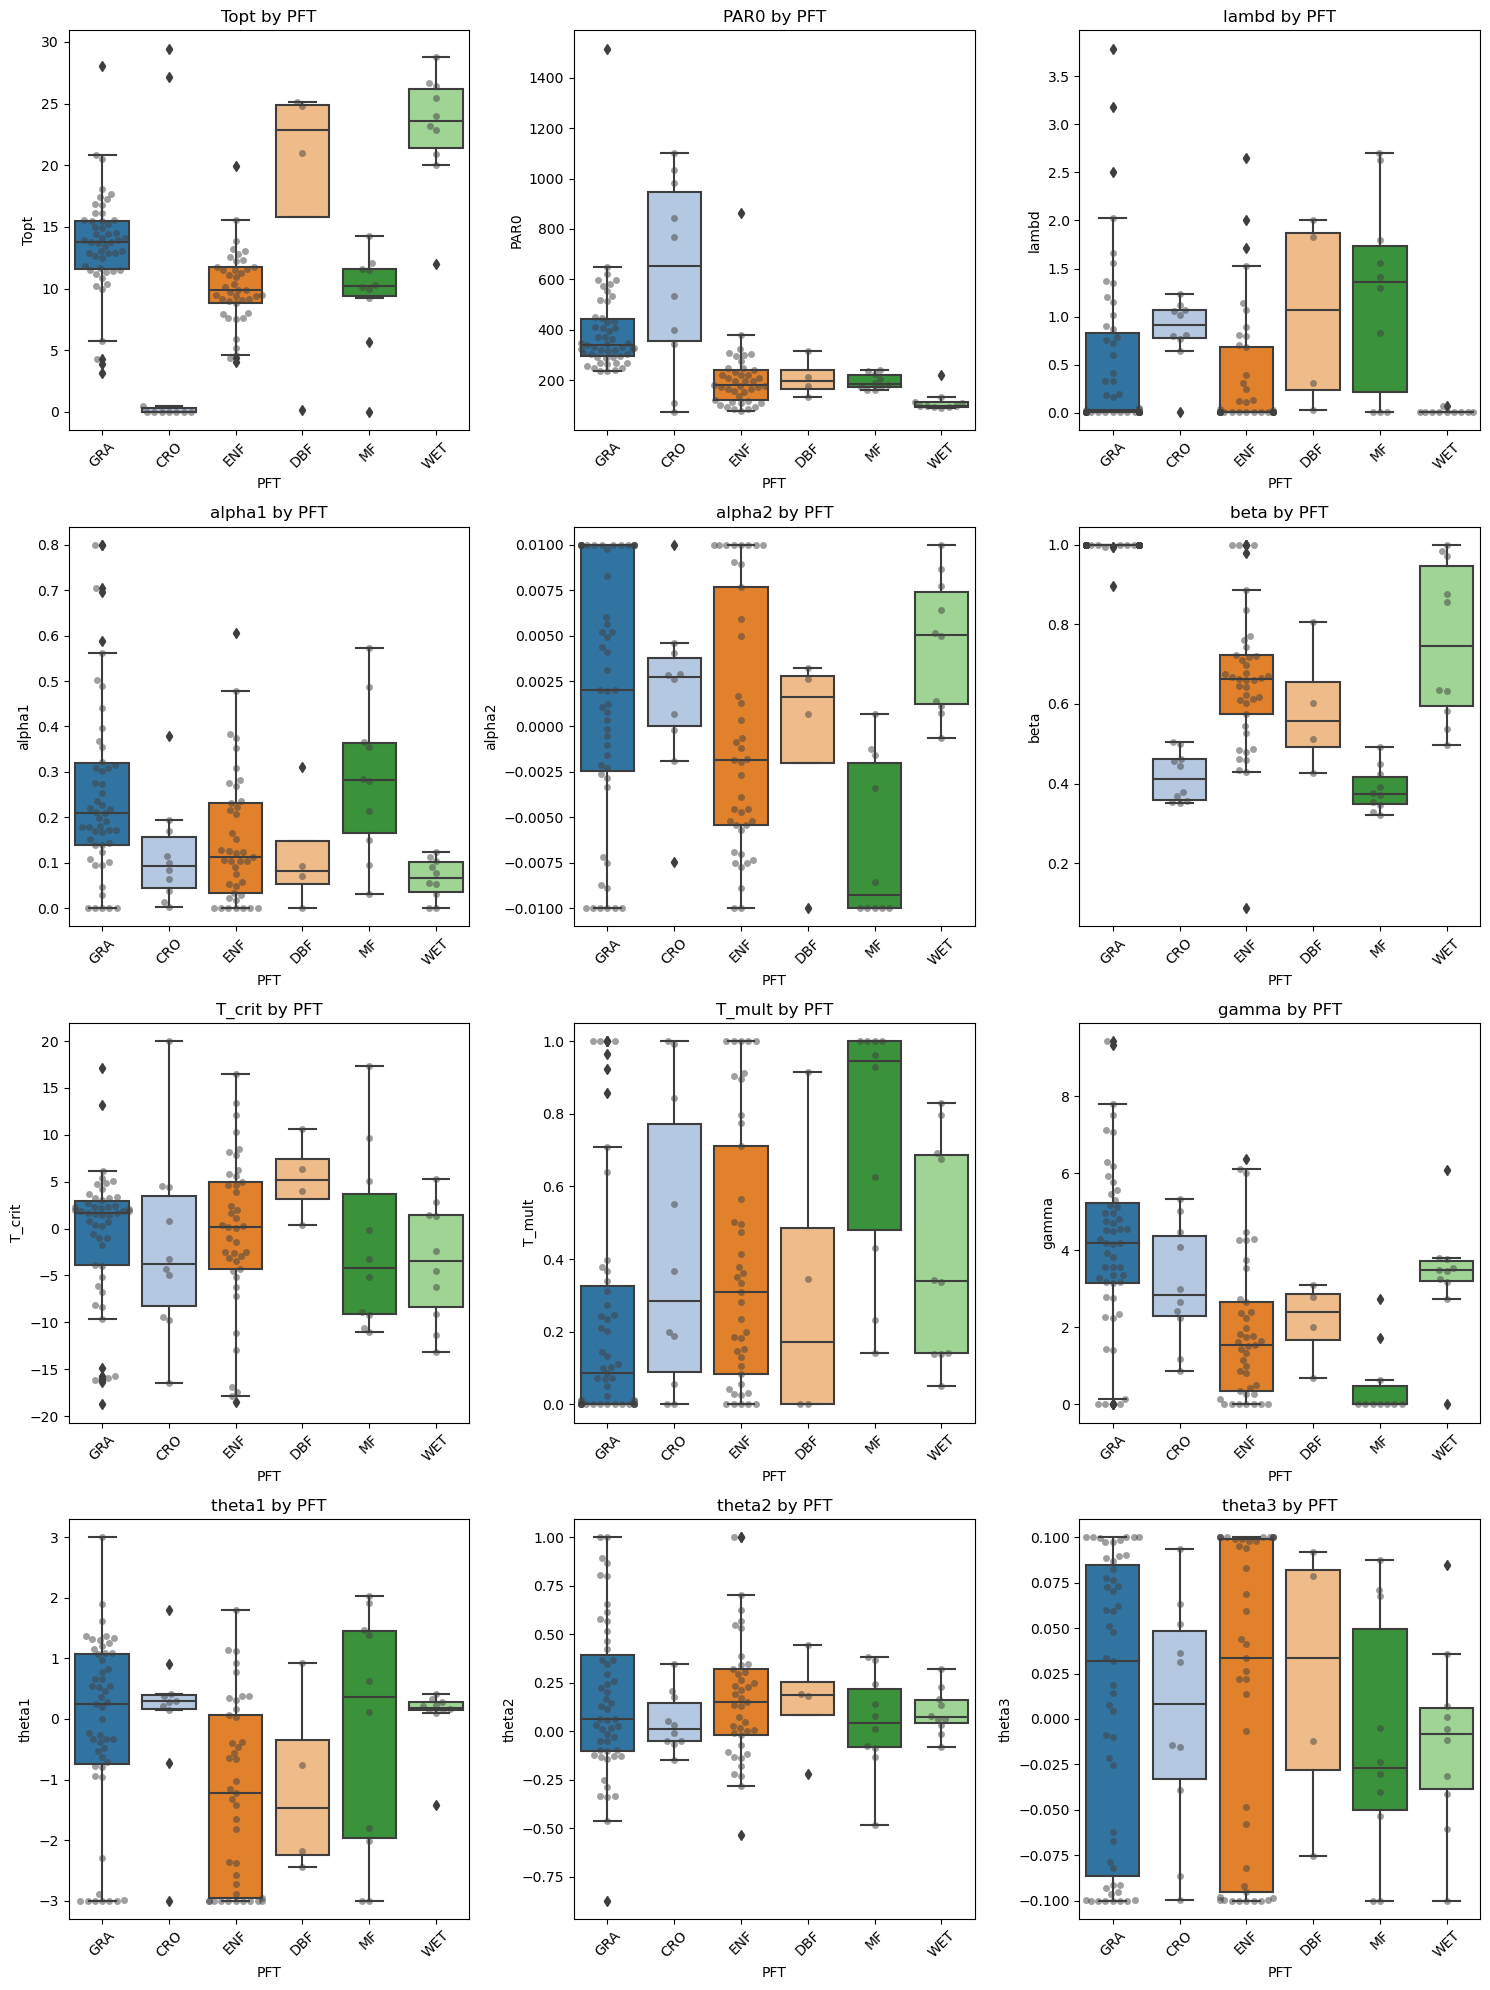

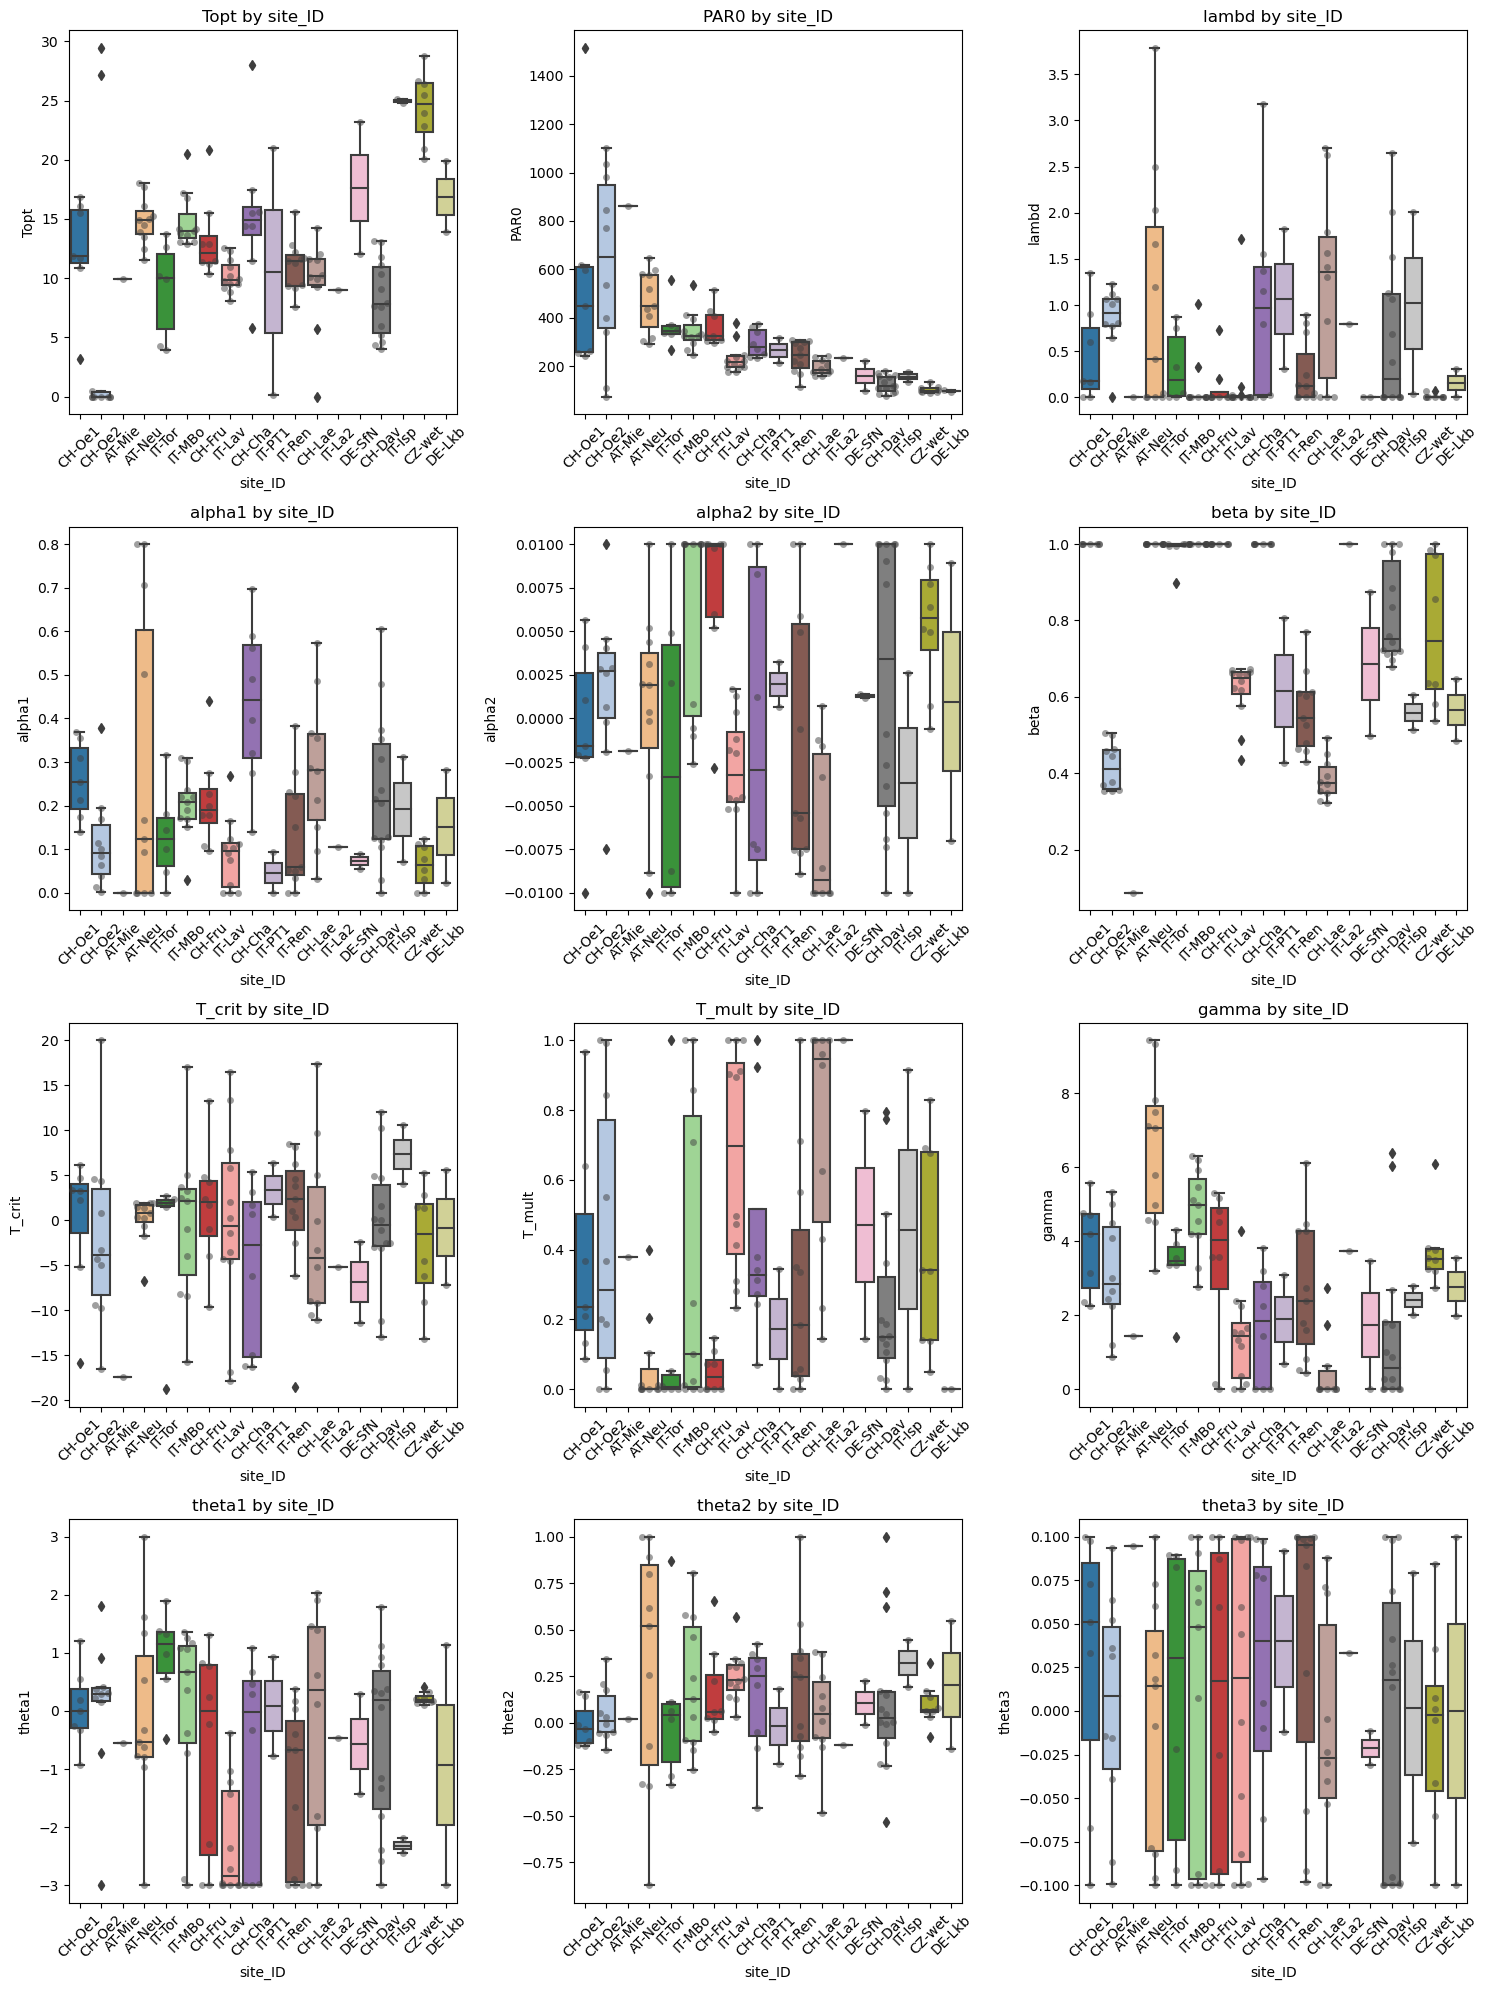

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

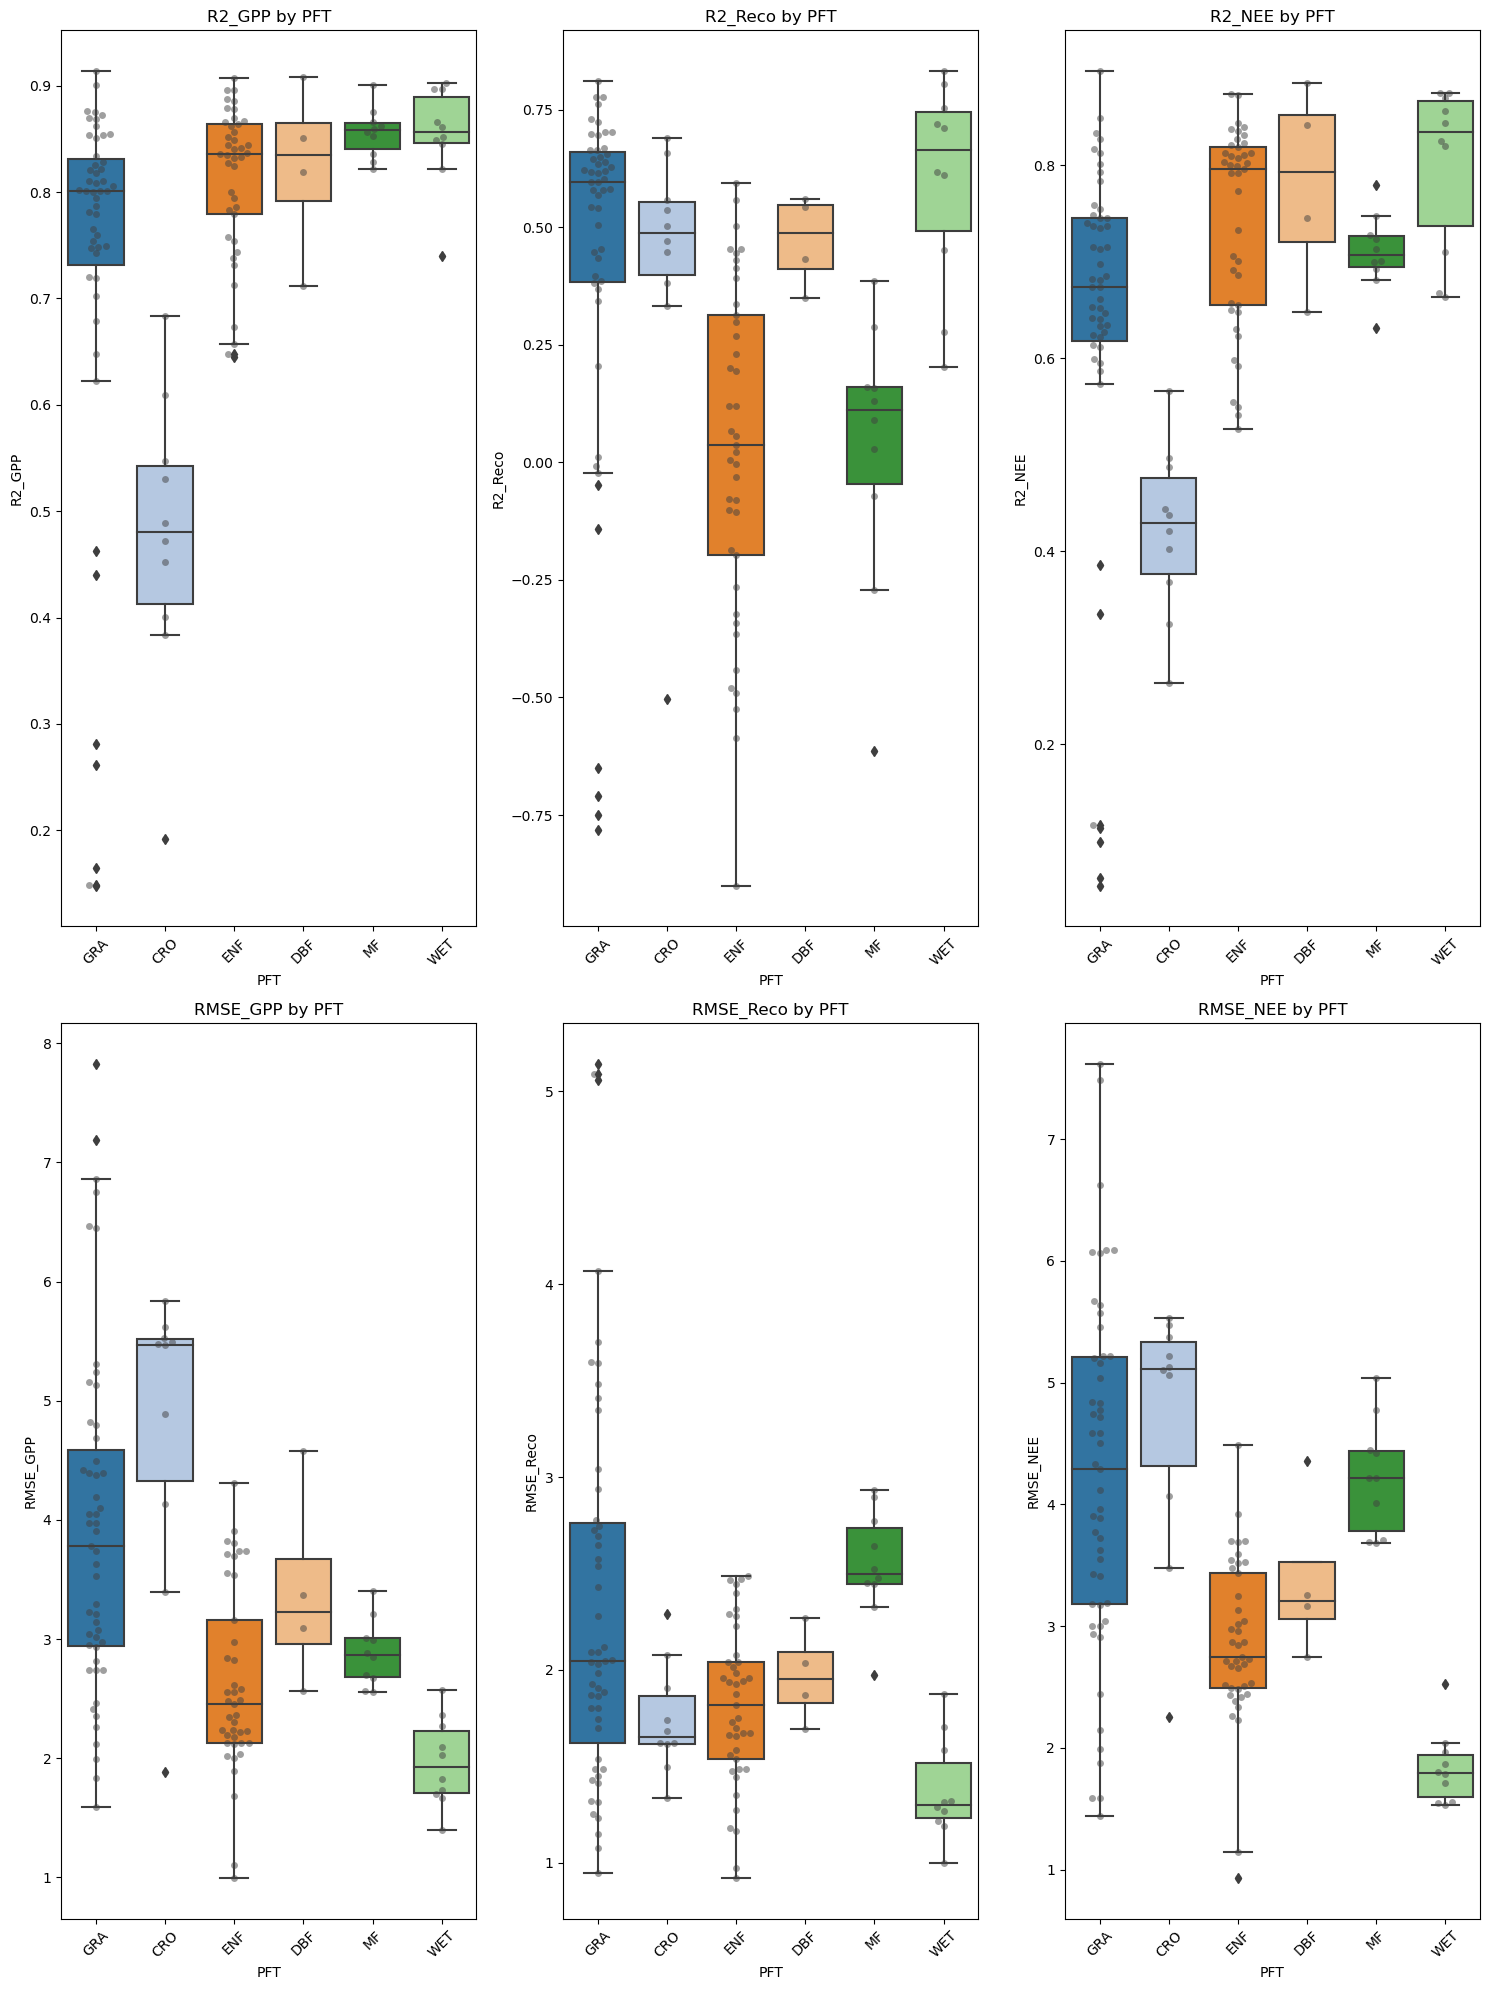

In [36]:
df_parameters = pd.read_excel("Tuned_params_VPRM_new_diff_evo_V2_10.xlsx")

parameters_to_plot = ['Topt', 'PAR0', 'lambd', 'alpha1', 'alpha2', 'beta', 'T_crit', 'T_mult', 'gamma', 'theta1', 'theta2', 'theta3']

color_palette = 'tab20'  # 'muted', 'deep', 'husl'
sns.set_palette(color_palette)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, parameter in enumerate(parameters_to_plot):
    sns.boxplot(x='PFT', y=parameter, data=df_parameters, ax=axes[i])
    sns.swarmplot(x='PFT', y=parameter, data=df_parameters, color="0.25", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by PFT')
    axes[i].set_xlabel('PFT')
    axes[i].set_ylabel(parameter)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(
    base_path 
    + "/boxplot_PFTs_"
    + run_ID
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, parameter in enumerate(parameters_to_plot):
    sns.boxplot(x='site_ID', y=parameter, data=df_parameters, ax=axes[i])
    sns.swarmplot(x='site_ID', y=parameter, data=df_parameters, color="0.25", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by site_ID')
    axes[i].set_xlabel('site_ID')
    axes[i].set_ylabel(parameter)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(
    base_path +
    "/boxplot_siteIDs_"
    + run_ID
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

parameters_to_plot = ['R2_GPP', 'R2_Reco', 'R2_NEE', 'RMSE_GPP', 'RMSE_Reco', 'RMSE_NEE']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, parameter in enumerate(parameters_to_plot):
    sns.boxplot(x='PFT', y=parameter, data=df_parameters, ax=axes[i])
    sns.swarmplot(x='PFT', y=parameter, data=df_parameters, color="0.25", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by PFT')
    axes[i].set_xlabel('PFT')
    axes[i].set_ylabel(parameter)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(
    base_path +
    "/boxplot_R2_RMSE_"
    + run_ID
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)

/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categori

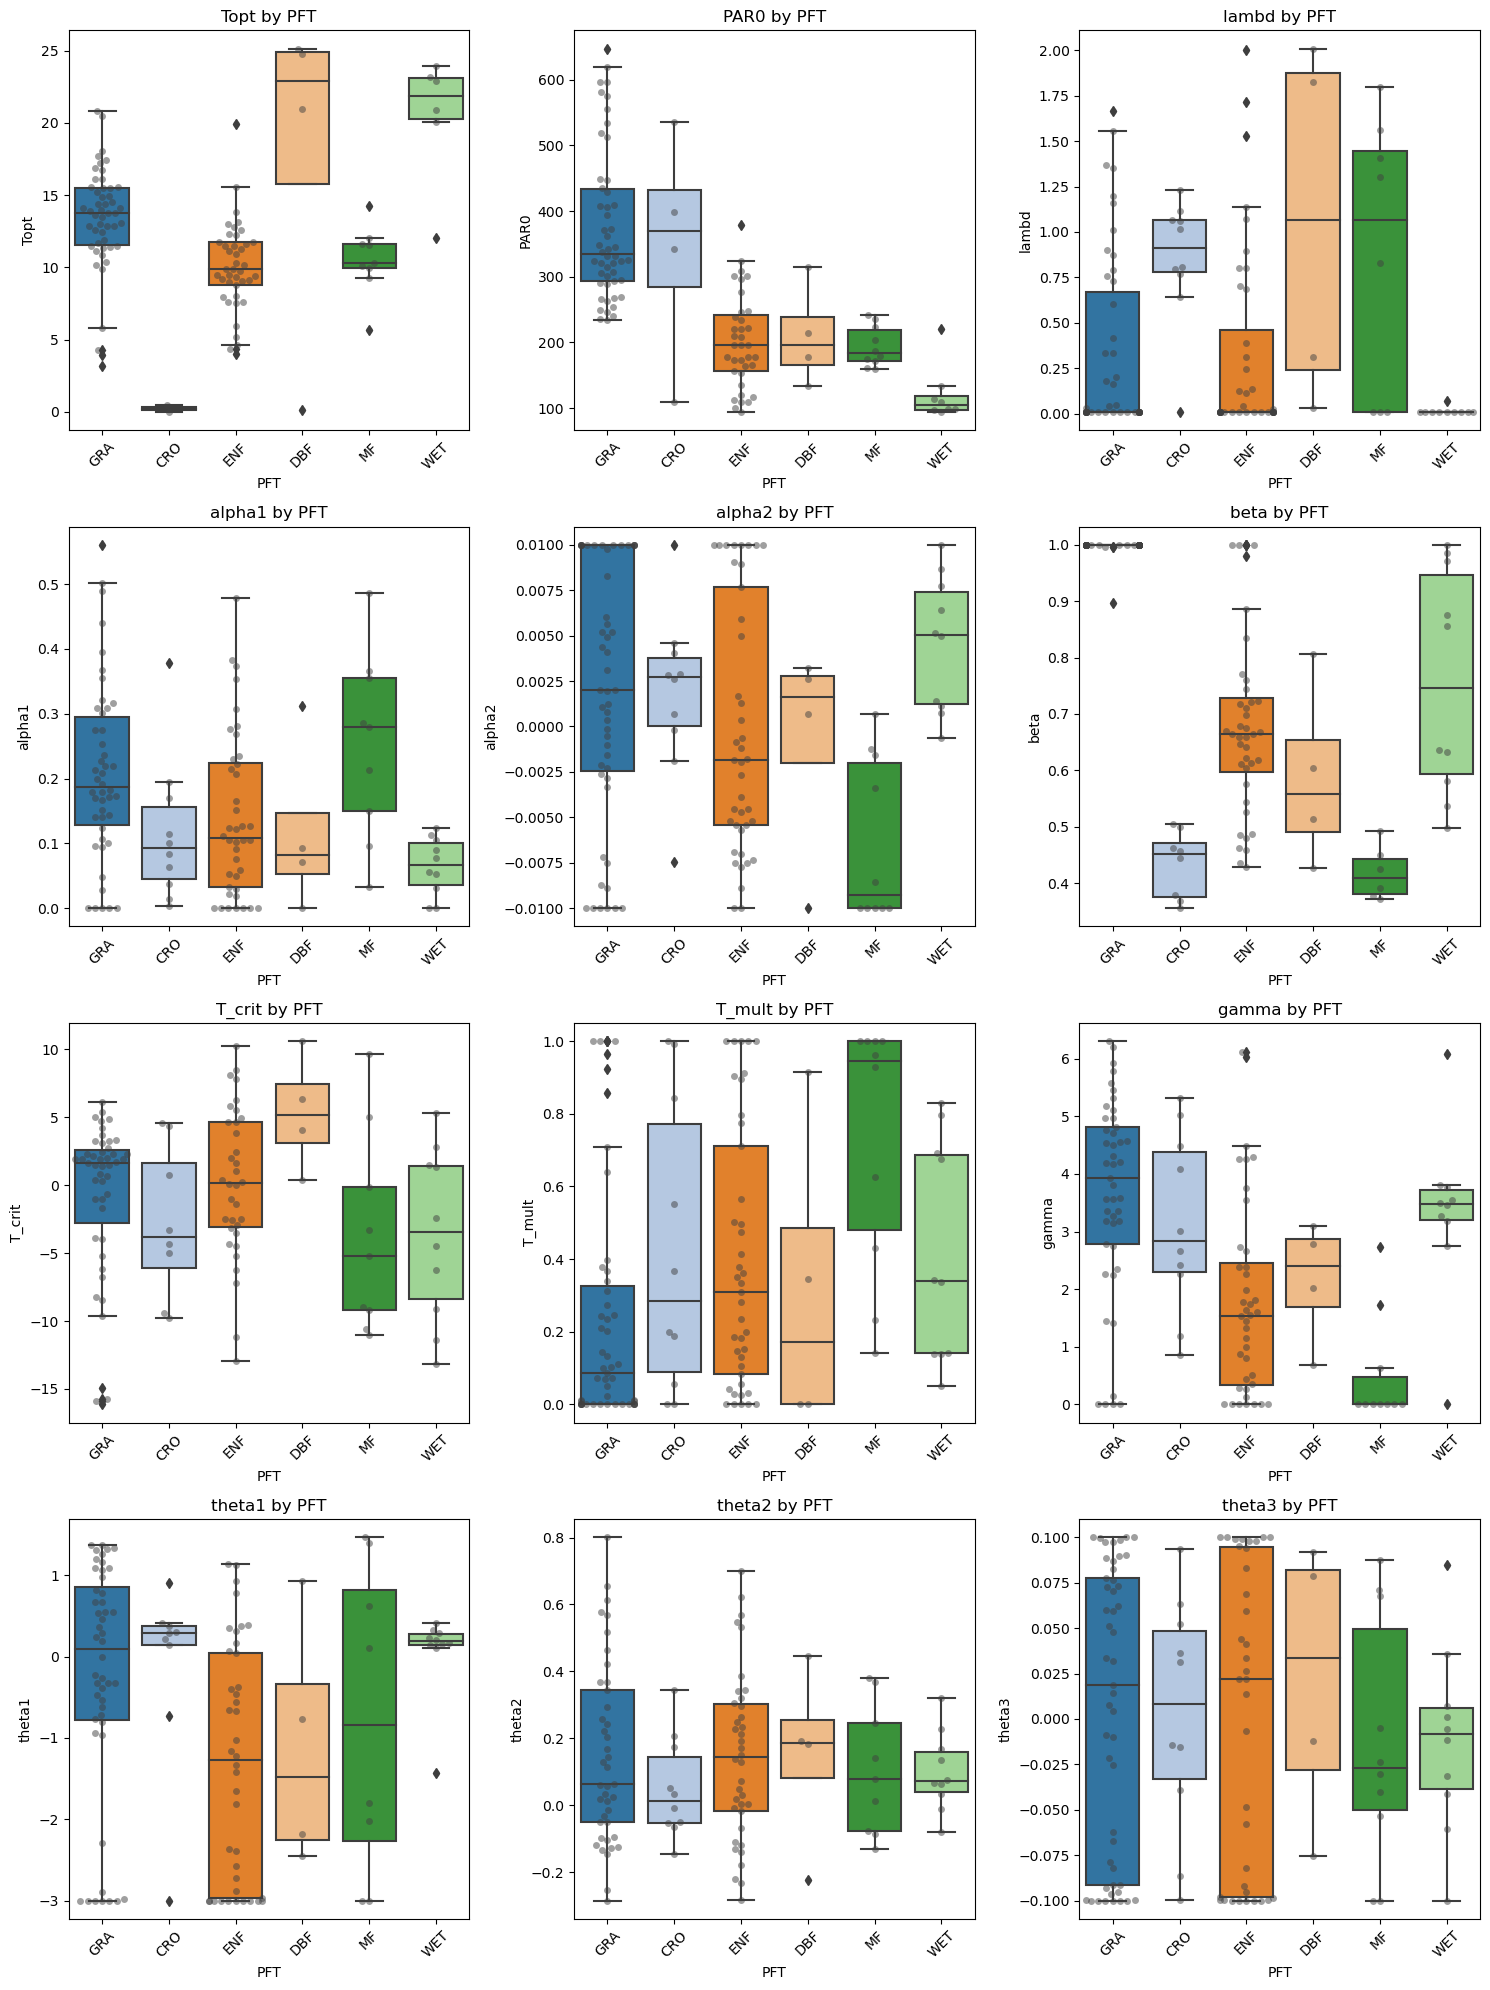

In [42]:
parameters_to_plot = ['Topt', 'PAR0', 'lambd', 'alpha1', 'alpha2', 'beta', 'T_crit', 'T_mult', 'gamma', 'theta1', 'theta2', 'theta3']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

mean_median_df = pd.DataFrame(columns=['Parameter', 'Mean', 'Median'])

for i, parameter in enumerate(parameters_to_plot):
    q_low = df_parameters[parameter].quantile(0.05)
    q_high = df_parameters[parameter].quantile(0.95)
    filtered_data = df_parameters[(df_parameters[parameter] >= q_low) & (df_parameters[parameter] <= q_high)]
    sns.boxplot(x='PFT', y=parameter, data=filtered_data, ax=axes[i])
    sns.swarmplot(x='PFT', y=parameter, data=filtered_data, color="0.25", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by PFT')
    axes[i].set_xlabel('PFT')
    axes[i].set_ylabel(parameter)
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.savefig(base_path + "/boxplot_PFTs_filtered_with_median_"+run_ID+".eps", dpi=300, bbox_inches="tight")
plt.show()


In [38]:
import pandas as pd


filtered_mean_median_df = pd.DataFrame(columns=['PFT', 'Parameter', 'Filtered_Mean', 'Filtered_Median'])
grouped = df_parameters.groupby('PFT')

for parameter in parameters_to_plot:
    for pft, group_data in grouped:
        q_low = group_data[parameter].quantile(0.05)
        q_high = group_data[parameter].quantile(0.95)
        filtered_data = group_data[(group_data[parameter] >= q_low) & (group_data[parameter] <= q_high)]
        filtered_mean = filtered_data[parameter].mean()
        filtered_median = filtered_data[parameter].median()
        filtered_mean_median_df = filtered_mean_median_df.append({'PFT': pft, 'Parameter': parameter, 'Filtered_Mean': filtered_mean, 'Filtered_Median': filtered_median}, ignore_index=True)

filtered_mean_median_df.to_excel(base_path + "/filtered_mean_median_values"+run_ID+".xlsx", index=False)


/tmp/ipykernel_9549/3078702647.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_mean_median_df = filtered_mean_median_df.append({'PFT': pft, 'Parameter': parameter, 'Filtered_Mean': filtered_mean, 'Filtered_Median': filtered_median}, ignore_index=True)
/tmp/ipykernel_9549/3078702647.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_mean_median_df = filtered_mean_median_df.append({'PFT': pft, 'Parameter': parameter, 'Filtered_Mean': filtered_mean, 'Filtered_Median': filtered_median}, ignore_index=True)
/tmp/ipykernel_9549/3078702647.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_mean_median_df = filtered_mean_median_df.append({'PFT': pft, 'Parameter': parameter, 'Filtered_Mean': filter

In [39]:

# def write_filtered_params_to_excel(
#     optimized_params_df_all, base_path, VPRM_old_or_new, opt_method, maxiter
# ):
#     if VPRM_old_or_new == "new":
#         parameters_to_plot = [
#             "Topt",
#             "PAR0",
#             "lambd",
#             "alpha1",
#             "alpha2",
#             "beta",
#             "T_crit",
#             "T_mult",
#             "gamma",
#             "theta1",
#             "theta2",
#             "theta3",
#         ]
#     else:
#         parameters_to_plot = [
#             "Topt",
#             "PAR0",
#             "lambd",
#             "alpha",
#             "beta",
#         ]

#     # Create an empty list to store the filtered mean and median values
#     filtered_mean_median_data = []

#     # Group the data by PFT
#     grouped = optimized_params_df_all.groupby("PFT")

#     # Iterate over each parameter
#     for parameter in parameters_to_plot:
#         # Iterate over each group (PFT)
#         for pft, group_data in grouped:
#             # Calculate the percentiles for filtering
#             q_low = group_data[parameter].quantile(0.05)
#             q_high = group_data[parameter].quantile(0.95)

#             # Filter the data
#             filtered_data = group_data[
#                 (group_data[parameter] >= q_low) & (group_data[parameter] <= q_high)
#             ]

#             # Calculate the filtered mean and median
#             filtered_mean = filtered_data[parameter].mean()
#             filtered_median = filtered_data[parameter].median()

#             # Append the results to the list
#             filtered_mean_median_data.append(
#                 {
#                     "PFT": pft,
#                     "Parameter": parameter,
#                     "Filtered_Mean": filtered_mean,
#                     "Filtered_Median": filtered_median,
#                 }
#             )

#     # Create a DataFrame from the list of dictionaries
#     filtered_mean_median_df = pd.DataFrame(filtered_mean_median_data)

#     # Save the DataFrame to an Excel file
#     filtered_mean_median_df.to_excel(
#         base_path
#         + "paramerters_mean_and_median_per_PFT_VPRM_"
#         + VPRM_old_or_new
#         + "_"
#         + str(opt_method)
#         + "_"
#         + str(maxiter)
#         + ".xlsx",
#         index=False,
#     )


In [40]:

# def boxplots_per_PFT_and_ID(
#     df_parameters, base_path, VPRM_old_or_new, opt_method, maxiter
# ):
#     if VPRM_old_or_new == "new":
#         parameters_to_plot = [
#             "Topt",
#             "PAR0",
#             "lambd",
#             "alpha1",
#             "alpha2",
#             "beta",
#             "T_crit",
#             "T_mult",
#             "gamma",
#             "theta1",
#             "theta2",
#             "theta3",
#         ]
#     else:
#         parameters_to_plot = [
#             "Topt",
#             "PAR0",
#             "lambd",
#             "alpha",
#             "beta",
#         ]

#     color_palette = "muted"  # 'muted', 'deep', 'husl'
#     sns.set_palette(color_palette)
#     if VPRM_old_or_new == "new":
#         fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
#     else:
#         fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))
#     axes = axes.flatten()

#     for var_i in ["PFT", "site_ID"]:
#         for i, parameter in enumerate(parameters_to_plot):
#             sns.boxplot(x=var_i, y=parameter, data=df_parameters, ax=axes[i])
#             sns.swarmplot(
#                 x=var_i,
#                 y=parameter,
#                 data=df_parameters,
#                 color="0.25",
#                 alpha=0.5,
#                 ax=axes[i],
#             )
#             axes[i].set_title(f"{parameter} by {var_i}")
#             axes[i].set_xlabel(var_i)
#             axes[i].set_ylabel(parameter)
#             axes[i].tick_params(axis="x", rotation=45)

#         plt.tight_layout()
#         plt.savefig(
#             base_path
#             + "paramerters_boxplot_"
#             + var_i
#             + "s_VPRM_"
#             + VPRM_old_or_new
#             + "_"
#             + str(opt_method)
#             + "_"
#             + str(maxiter)
#             + ".eps",
#             dpi=300,
#             bbox_inches="tight",
#         )
#         plt.close(fig)
